### Modelling a Covid-19 Detector using LinearRegresssion() algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
%matplotlib inline

#### Data Preprocessing

In [2]:
dataset = pd.read_csv("corona_tested_individuals_ver_006.english.csv")

C:\Users\MULONGO CHELOTI\.conda\envs\covid\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
dataset.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


In [4]:
dataset.tail()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
278843,2020-03-11,0,0,0,0,0,negative,None,None,Other
278844,2020-03-11,0,0,0,0,0,negative,None,None,Other
278845,2020-03-11,0,0,0,0,0,positive,None,None,Contact with confirmed
278846,2020-03-11,0,0,0,0,0,other,None,None,Other
278847,2020-03-11,0,0,0,0,0,negative,None,None,Other


In [5]:
dataset.dtypes

test_date              object
cough                  object
fever                  object
sore_throat            object
shortness_of_breath    object
head_ache              object
corona_result          object
age_60_and_above       object
gender                 object
test_indication        object
dtype: object

In [6]:
dataset.cough.unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [7]:
dataset.fever.unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [8]:
dataset.sore_throat.unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [9]:
dataset.shortness_of_breath.unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [10]:
dataset.head_ache.unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [11]:
## Data Type Conversion
dataset['cough'] = pd.to_numeric(dataset['cough'], errors='coerce')
dataset['fever'] = pd.to_numeric(dataset['fever'], errors='coerce')
dataset['sore_throat'] = pd.to_numeric(dataset['sore_throat'], errors='coerce')
dataset['shortness_of_breath'] = pd.to_numeric(dataset['shortness_of_breath'], errors='coerce')
dataset['head_ache'] = pd.to_numeric(dataset['head_ache'], errors='coerce')

<AxesSubplot:>

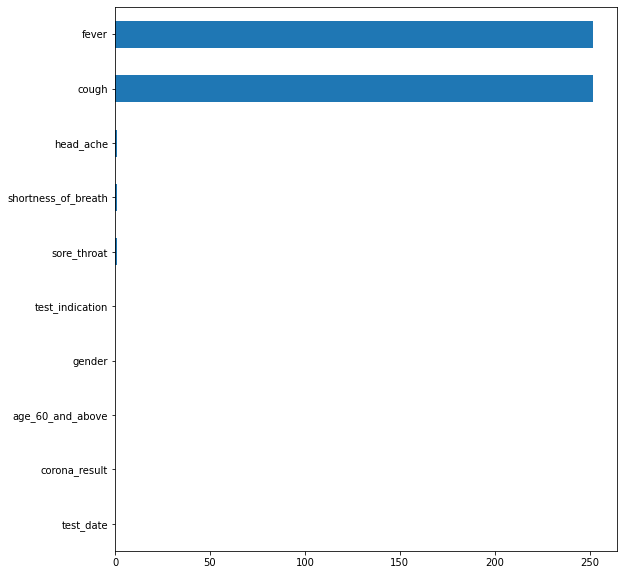

In [12]:
dataset.isna().sum().sort_values().plot(kind = "barh", figsize = (9,10))

In [13]:
# HANDLING MISSING VALUES
# convert the Na's i.e "None" to 0 for the first 5 columns
dataset = dataset.replace(np.nan, 0, regex=True)

<AxesSubplot:>

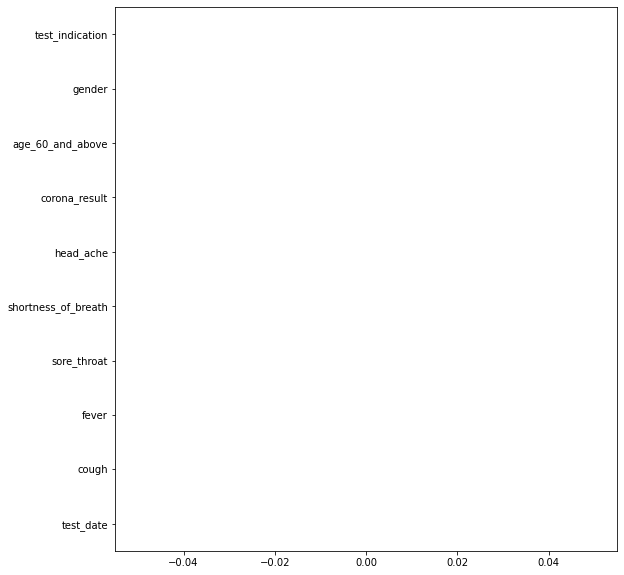

In [14]:
dataset.isna().sum().sort_values().plot(kind = "barh", figsize = (9,10))

No missing value(s) left

In [15]:
dataset.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0.0,0.0,0.0,0.0,0.0,negative,None,female,Other
1,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,None,female,Other
2,2020-04-30,0.0,1.0,0.0,0.0,0.0,negative,None,male,Other
3,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,None,female,Other
4,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,None,male,Other


In [16]:
dataset.shape

(278848, 10)

In [17]:
dataset.cough.value_counts()

0.0    236620
1.0     42228
Name: cough, dtype: int64

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   test_date            278848 non-null  object 
 1   cough                278848 non-null  float64
 2   fever                278848 non-null  float64
 3   sore_throat          278848 non-null  float64
 4   shortness_of_breath  278848 non-null  float64
 5   head_ache            278848 non-null  float64
 6   corona_result        278848 non-null  object 
 7   age_60_and_above     278848 non-null  object 
 8   gender               278848 non-null  object 
 9   test_indication      278848 non-null  object 
dtypes: float64(5), object(5)
memory usage: 21.3+ MB


In [19]:
## Dimension Reduction
new_dataframe = dataset.drop(columns = ["test_date", "gender","age_60_and_above"])
new_dataframe = new_dataframe.reset_index(drop=True)

new_dataframe.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,test_indication
0,0.0,0.0,0.0,0.0,0.0,negative,Other
1,1.0,0.0,0.0,0.0,0.0,negative,Other
2,0.0,1.0,0.0,0.0,0.0,negative,Other
3,1.0,0.0,0.0,0.0,0.0,negative,Other
4,1.0,0.0,0.0,0.0,0.0,negative,Other


In [20]:
new_dataframe.corona_result.unique()

array(['negative', 'positive', 'other'], dtype=object)

In [21]:
new_dataframe.corona_result.value_counts()

negative    260227
positive     14729
other         3892
Name: corona_result, dtype: int64

In [22]:
new_dataframe = new_dataframe[new_dataframe["corona_result"] != "other"]
new_dataframe = new_dataframe.reset_index(drop=True)

In [23]:
new_dataframe.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache
count,274956.000000,274956.000000,274956.000000,274956.000000,274956.000000
mean,0.151191,0.077740,0.006881,0.005634,0.008667
std,0.358236,0.267762,0.082667,0.074846,0.092692
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
new_dataframe.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,test_indication
0,0.0,0.0,0.0,0.0,0.0,negative,Other
1,1.0,0.0,0.0,0.0,0.0,negative,Other
2,0.0,1.0,0.0,0.0,0.0,negative,Other
3,1.0,0.0,0.0,0.0,0.0,negative,Other
4,1.0,0.0,0.0,0.0,0.0,negative,Other


In [25]:
new_dataframe.tail()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,test_indication
274951,0.0,0.0,0.0,0.0,0.0,negative,Other
274952,0.0,0.0,0.0,0.0,0.0,negative,Other
274953,0.0,0.0,0.0,0.0,0.0,negative,Other
274954,0.0,0.0,0.0,0.0,0.0,positive,Contact with confirmed
274955,0.0,0.0,0.0,0.0,0.0,negative,Other


In [26]:
new_dataframe.test_indication.unique()

array(['Other', 'Abroad', 'Contact with confirmed'], dtype=object)

In [27]:
new_dataframe.test_indication.value_counts()

Other                     239404
Abroad                     25074
Contact with confirmed     10478
Name: test_indication, dtype: int64

In [28]:
def freq_encoder(df, col):
  fe = df.groupby(col).size()/len(df)
  df[col+"_encoded"] = df[col].map(fe)
  return df

freq_enc_df = freq_encoder(new_dataframe, 'test_indication')

freq_enc_df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,test_indication,test_indication_encoded
0,0.0,0.0,0.0,0.0,0.0,negative,Other,0.870699
1,1.0,0.0,0.0,0.0,0.0,negative,Other,0.870699
2,0.0,1.0,0.0,0.0,0.0,negative,Other,0.870699
3,1.0,0.0,0.0,0.0,0.0,negative,Other,0.870699
4,1.0,0.0,0.0,0.0,0.0,negative,Other,0.870699


In [29]:
freq_enc_df = freq_enc_df.drop(columns=['test_indication'], axis=1)

freq_enc_df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,test_indication_encoded
0,0.0,0.0,0.0,0.0,0.0,negative,0.870699
1,1.0,0.0,0.0,0.0,0.0,negative,0.870699
2,0.0,1.0,0.0,0.0,0.0,negative,0.870699
3,1.0,0.0,0.0,0.0,0.0,negative,0.870699
4,1.0,0.0,0.0,0.0,0.0,negative,0.870699


In [30]:
freq_enc_df.test_indication_encoded.unique()

array([0.87069931, 0.09119277, 0.03810792])

0.87 - Other, 0.09 - Abroad, 0.038 - Contact with confirmed

In [31]:
X_features = freq_enc_df.drop(columns = ['corona_result'], axis=1)
y_target = freq_enc_df['corona_result']

In [32]:
X_features.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,test_indication_encoded
0,0.0,0.0,0.0,0.0,0.0,0.870699
1,1.0,0.0,0.0,0.0,0.0,0.870699
2,0.0,1.0,0.0,0.0,0.0,0.870699
3,1.0,0.0,0.0,0.0,0.0,0.870699
4,1.0,0.0,0.0,0.0,0.0,0.870699


In [33]:
y_target.head()

0    negative
1    negative
2    negative
3    negative
4    negative
Name: corona_result, dtype: object

In [34]:
encoded_y_target = np.where(freq_enc_df['corona_result'] == 'negative',0,1)
encoded_y_target

array([0, 0, 0, ..., 0, 1, 0])

##### Modelling

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [36]:
X_train, X_test, y_train,y_test = train_test_split(X_features, encoded_y_target, test_size=0.2, random_state=42)

In [37]:
covid_detector = LinearRegression()
covid_detector.fit(X_train,y_train)

predictions = covid_detector.predict(X_test)

In [38]:
## Predicted values
print(predictions)

[0.26715051 0.01773991 0.01773991 ... 0.01773991 0.01773991 0.01773991]


In [39]:
## Actual values
print(y_test)

[0 0 0 ... 0 0 0]


In [40]:
def mse(y_true, y_predicted):
    return  np.mean((y_true-y_predicted)**2)
    
mse_value = mse(y_test, predictions)
mse_value

0.0369784562191586

In [41]:
import joblib
from joblib import dump
dump(covid_detector, 'covid_detector_LR.joblib')

['covid_detector_LR.joblib']